<a href="https://colab.research.google.com/github/ShrutiThakur3/VCET-DS/blob/main/DataSet_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA** **ENGINEERING**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("creditcard.csv")
X = df.drop('Time', axis=1)
X = X.drop('Class', axis=1)
Y = df['Class']
print(X)
print(Y)

             V1        V2        V3        V4        V5        V6        V7  \
0     -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1      1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...         ...       ...       ...       ...       ...       ...       ...   
27814  1.443955 -1.052462 -0.141721 -1.564017 -0.966274 -0.333886 -0.777060   
27815 -0.263364  0.931818  1.193111 -0.507924  0.862019  0.249381  0.815449   
27816  0.976345 -1.024867  0.978714  0.639442 -1.413711  0.311635 -0.909035   
27817  1.464604 -0.437919 -0.018869 -1.057177 -0.154243  0.251215 -0.584866   
27818       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             V8        V9       V10  ...       V20 

[0.01311338 0.03313381 0.04309667 0.05300442 0.02990531 0.03131491
 0.03532495 0.02146202 0.04725511 0.05923989 0.05188894 0.05491171
 0.01101742 0.05533525 0.01884308 0.05513244 0.07516236 0.04292507
 0.01825347 0.01627838 0.02784863 0.01982332 0.0178298  0.02399824
 0.02244301 0.05263712 0.02350211 0.01946017 0.02585901]


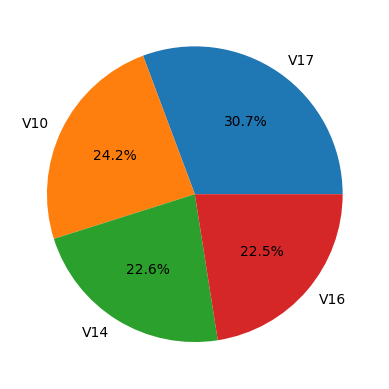

In [3]:
#Feature Selection

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame handling
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical variables

model = ExtraTreesClassifier()

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform) # Apply LabelEncoder to all columns in X

# Handle missing values in the target variable 'Y'
Y = Y.dropna() # Drop rows with missing values in 'Y'

# Align X_encoded and Y after handling missing values
X_encoded = X_encoded.loc[Y.index] # Select rows in X_encoded that correspond to non-missing Y values

model.fit(X_encoded,Y) # Fit the model with encoded features and non-missing target values
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns) # Use encoded column names
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
#plot(kind='box')
# plot(kind='area')
# plot(kind='line', marker='o')
plt.show()

In [4]:
print(df.isnull().sum())

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [5]:
# dealing with missing values
df['Amount'].fillna((df['Amount'].mean()), inplace=True)
df['Class'].fillna((df['Class'].mean()), inplace=True)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the credit card fraud detection dataset (assuming it's in CSV format)
creditcard_data = pd.read_csv('creditcard.csv')

# Split the dataset into training and test sets
train_df, test_df = train_test_split(creditcard_data, test_size=0.2, random_state=42)

# Define bins and labels for 'Amount' column
amount_bins = [0, 100, 500, 1000, 5000, 10000, 25000]
amount_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']

# Apply bins to 'Amount' column
train_df['AmountGroup'] = pd.cut(train_df['Amount'], bins=amount_bins, labels=amount_labels, right=False)
test_df['AmountGroup'] = pd.cut(test_df['Amount'], bins=amount_bins, labels=amount_labels, right=False)

# Display the first few rows of the modified training data
print(train_df.head())

# Display the first few rows of the modified test data
print(test_df.head())


        Time        V1        V2        V3        V4        V5        V6  \
20755  31250  1.178272  0.395434  0.565598  1.193710 -0.407813 -1.084860   
8341   11147 -1.027676  1.657269  0.886463  1.322832 -0.011144 -0.790305   
7582   10476 -1.276023 -0.312490  1.820216 -0.625180  0.833739 -0.989602   
812      619  1.121028 -0.626311  0.105123  0.634477  1.219799  4.700368   
13911  24681  1.195327  0.183414  0.691356  1.029198  0.040754  0.653726   

             V7        V8        V9  ...       V22       V23       V24  \
20755  0.280926 -0.284385 -0.170599  ... -0.358777  0.058503  0.716573   
8341   0.474776  0.119987  0.424158  ...  0.307971 -0.122514  0.546792   
7582   0.126145 -0.072200  1.482627  ... -0.227123 -0.060524  0.055805   
812   -1.488651  1.287611  1.498948  ... -0.198571 -0.119171  1.037529   
13911 -0.517340  0.087805  1.346319  ... -0.186297 -0.171960 -1.088617   

            V25       V26       V27       V28  Amount  Class  AmountGroup  
20755  0.457328 -0.577

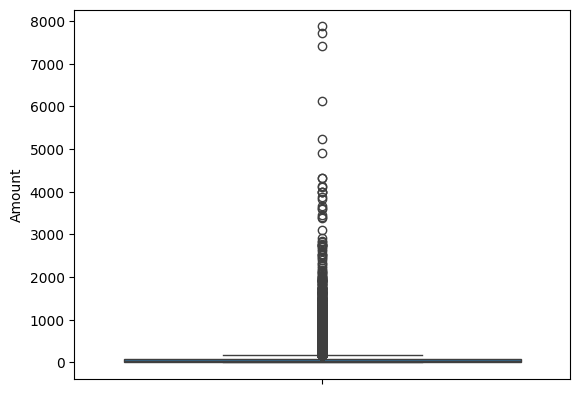

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Amount'])
plt.show()

In [8]:
#Dealing with Outliers using Interquantile Range
# Check the data type of the column and convert if necessary
if df['Amount'].dtype == object:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce') # Convert to numeric, replace non-numeric with NaN

# Fill NaN values if any were introduced during conversion
df['Amount'].fillna(df['Amount'].mean(), inplace=True) # Replace NaN with mean

print(df['Amount'])
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Amount'] < lower].values
out2=df[df['Amount'] > upper].values

df['Amount'].replace(out1,lower,inplace=True)
df['Amount'].replace(out2,upper,inplace=True)

print(df['Amount'])

0        149.620000
1          2.690000
2        378.660000
3        123.500000
4         69.990000
            ...    
27814     32.390000
27815      1.490000
27816    151.000000
27817      8.000000
27818     77.297298
Name: Amount, Length: 27819, dtype: float64
63.07500000000001
164.13250000000002
-88.16750000000002
0        149.620000
1          2.690000
2        164.132500
3        123.500000
4         69.990000
            ...    
27814     32.390000
27815      1.490000
27816    151.000000
27817      8.000000
27818     77.297298
Name: Amount, Length: 27819, dtype: float64


In [9]:
#Oversampling and Under Sampling

from collections import Counter
import numpy as np # import numpy

print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)

# Check the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# If there is a mismatch, investigate and fix the issue.
# For example, if Y is missing a value, you might append the appropriate value:
if X.shape[0] != Y.shape[0]:
    # Assuming Y is missing a value, append the most frequent class
    most_frequent_class = Y.value_counts().index[0]
    Y = np.append(Y, [most_frequent_class])  # Append the missing value

# After fixing the mismatch, proceed with resampling:
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))


# Before applying SMOTE, fill NaN values in 'X'
X = X.fillna(X.mean()) # Fill NaN with the mean of each column

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

Counter({0.0: 27725, 1.0: 93})
Shape of X: (27819, 29)
Shape of Y: (27818,)
Counter({0.0: 27726, 1.0: 27726})


In [10]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas for handling DataFrames

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Amount', axis=1)
X = X.drop('Class', axis=1)
Y = df['Class']

# Fill any remaining NaN values in the entire DataFrame 'X'
X.fillna(X.mean(), inplace=True)  # Fill NaN with the mean of each column

pca.fit(X)
X=pca.transform(X)

# --- Check and convert Y to binary if needed ---
# Check if Y is already binary (contains only two unique values)
if len(Y.unique()) != 2:
    print("Warning: Y does not appear to be binary. Converting...")
    # Convert Y to binary (assuming it's a continuous variable you want to classify)
    threshold = Y.mean()  # Choose a threshold for binary classification
    Y = (Y > threshold).astype(int)  # Convert to 0 and 1 based on threshold

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)

# Check the types of your variables before calculating accuracy
print("Type of y_test:", type(y_test))
print("Type of y_pred:", type(y_pred))
print("Unique values in y_test:", y_test.unique())
print("Unique values in y_pred:", np.unique(y_pred))

print(accuracy_score(y_test,y_pred))

[[ 2.04346342e+04 -3.05198650e-01]
 [ 2.04346342e+04 -3.82228751e-01]
 [ 2.04336342e+04 -4.62923509e-01]
 ...
 [-1.42773658e+04 -6.03049319e-01]
 [-1.42773658e+04 -9.03414219e-01]
 [ 2.04006343e+04  3.54638414e-02]]
Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]
0.9973640067098011


# **ML** **CLASSIFICATION**

In [11]:
# naive
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Read the dataset
df = pd.read_csv("creditcard.csv")

# Prepare the feature and target variables
x = df.drop(['Time', 'Amount'], axis=1)
y = df['Class']

# One-hot encode categorical variables if necessary
x = pd.get_dummies(x)

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.4)

# Handle Missing Values in 'y_train' and 'y_test'
# Fill NaN with the most frequent class in the respective sets
y_train = y_train.fillna(y_train.value_counts().index[0])
y_test = y_test.fillna(y_test.value_counts().index[0])

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = nb.predict(X_test)

# Print the accuracy score
print("Naive Bayes: ", accuracy_score(y_test, y_pred1))

Naive Bayes:  1.0


In [12]:
#Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # Import SimpleImputer

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

# Handle Missing Values in 'y_train' and 'y_test'
# Fill NaN with the most frequent class in the respective sets
y_train = y_train.fillna(y_train.value_counts().index[0])
y_test = y_test.fillna(y_test.value_counts().index[0])

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

1.0


In [13]:
#  Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaN values

rf=RandomForestClassifier()

# Assuming 'x' and 'y' are defined from previous cells, handle NaN in 'y' before splitting
imputer = SimpleImputer(strategy='most_frequent') # Use most frequent for categorical target
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)) # Reshape for single feature imputation
y_imputed = y_imputed.ravel() # Flatten back to 1D array

X_train,X_test,y_train,y_test=train_test_split(x, y_imputed, random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

1.0


# **VISUALIZATION**

In [14]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns


df=pd.read_csv("creditcard.csv")

#Preparing X and Y

X = df.drop('Amount', axis=1)
X = X.drop('Class', axis=1)
Y = df['Class']

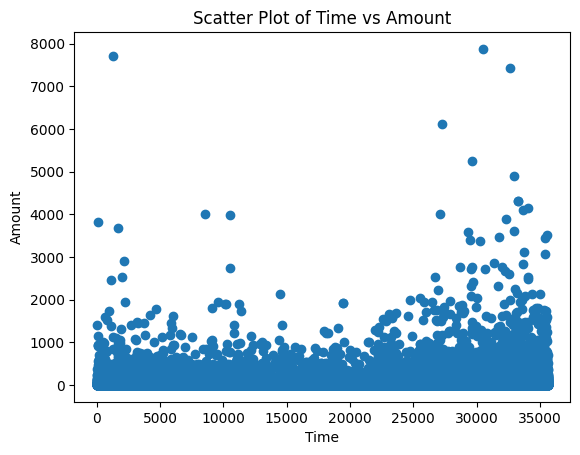

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the wine quality dataset (assuming it's in CSV format)
wine_data = pd.read_csv('creditcard.csv')

# Plotting PetalLengthCm vs PetalWidthCm
plt.scatter(wine_data['Time'], wine_data['Amount'])
plt.title("Scatter Plot of Time vs Amount")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

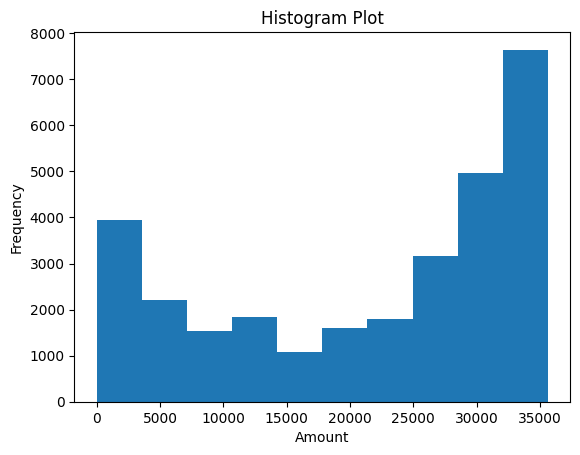

In [16]:
#Histrogram shows the distribution of a continuous variable.
  # It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["Time"])
plt.title("Histogram Plot")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

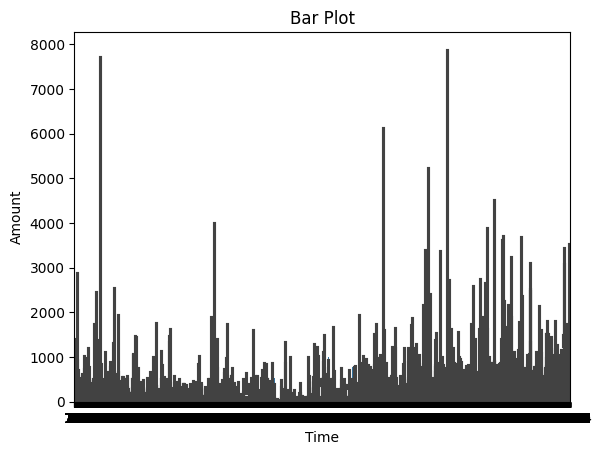

In [17]:
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(x="Time", y="Amount", data=df) # Pass data as a named argument and specify x and y
plt.title("Bar Plot")
plt.show()

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

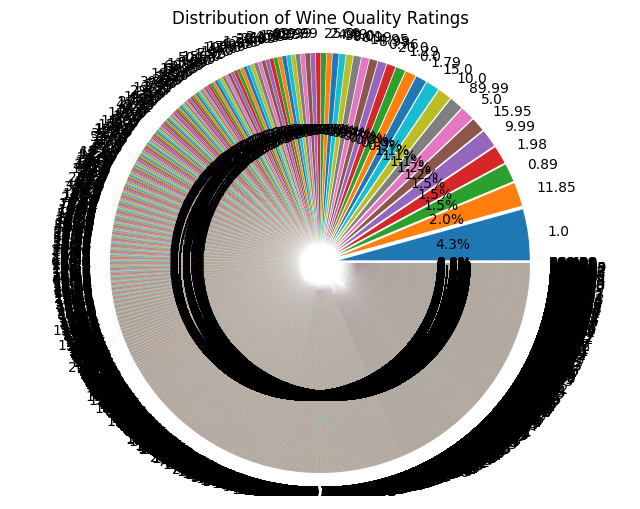

In [18]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
import matplotlib.pyplot as plt

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('wine_quality.csv')

# Display the first few rows to understand the structure
print(df.head())

# Counting the frequency of each 'quality' category
quality_counts = df['Amount'].value_counts()

# Creating an explode tuple with the correct length
explode = tuple([0.1] * len(quality_counts)) # Adjust 0.1 to your desired explosion value

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', explode=explode) # Use the dynamically created explode tuple
plt.title('Distribution of Wine Quality Ratings')
plt.axis('equal')
plt.show()

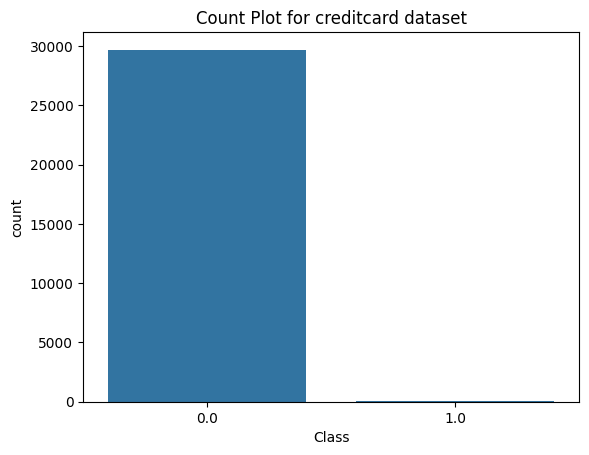

In [19]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Class', data = df)
plt.title("Count Plot for creditcard dataset")
plt.show()

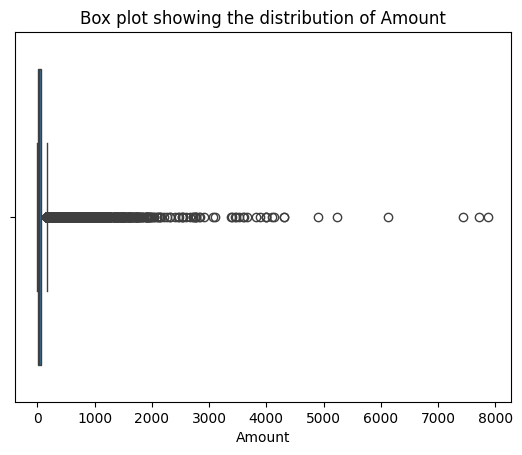

In [20]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='Amount', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Amount")
plt.show()

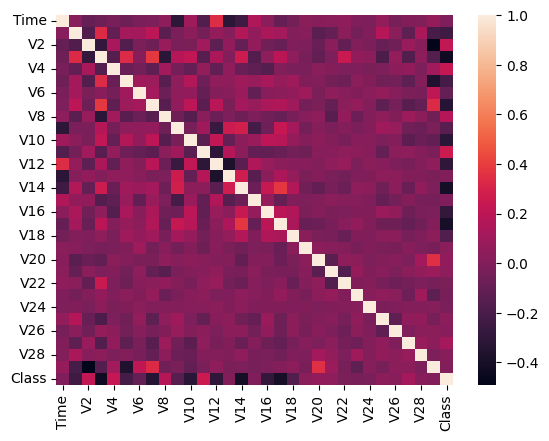

In [21]:
#Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns for correlation calculation
sns.heatmap(numeric_df.corr())
plt.show()